In [6]:
# autoři: Jan Kubát, Jan Matějka

In [7]:
# importy potřebných knihoven
import pandas
import scipy
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from operator import itemgetter
from collections import Counter
import copy

In [8]:
# výpočet hodnot pro vstupní data
K = 8
L = len("Kubát")
X = ((K*L*23) % 20) + 1
Y = ((X + ((K*5 + L*7) % 19)) % 20) + 1
print("X = ",X)
print("Y = ",Y)

X =  1
Y =  20


In [9]:
# 1. Z obou datových souborů načtěte texty k analýze. Pro každý text zvlášť odhadněte základní 
#    charakteristiky délek slov, tj. střední hodnotu a rozptyl. Graficky znázorněte rozdělení délek slov.

# X)
# parsování vstupního souboru
d = list()
with open("hw1-source/00" + str(X) + ".txt") as f:
    for line in f:
        d.append(line)
        
# vytvoření kolekce slov s jejich délkou
words = d[1].split(" ")
words_with_len = list()
for word in words:
    words_with_len.append((len(word), word))

# vytvoření datové struktury k pohodlné práci s daty
data = pandas.DataFrame([{'word_length': a, 'word': b}
                  for a, b in words_with_len
                  if True])
print("Prvních 20 slov v odstavci:")
print(data[:20])

# příprava dat pro histogram
data_grouped = data.groupby('word_length').count()

Prvních 20 slov v odstavci:
        word  word_length
0        the            3
1   children            8
2     called            6
3        him            3
4    pierrot            7
5       from            4
6        the            3
7      first            5
8       that            4
9         is            2
10        of            2
11    course            6
12        no            2
13    proper            6
14      name            4
15       for            3
16         a            1
17   flemish            7
18       dog            3
19       but            3


In [10]:
print('Střední hodnota: ' + str(np.mean(data['word_length'])))
print('Rozptyl: ' + str(np.var(data['word_length'])))

Střední hodnota: 4.3825
Rozptyl: 4.13619375


[ 24. 163. 288. 261. 163. 113.  93.  41.  29.  12.  10.   2.   1.]


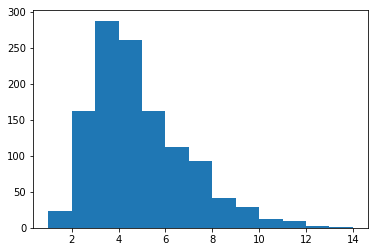

In [11]:
# zobrazeni histogramu pro hodnotu X
N, bins, patches = plt.hist(data['word_length'], bins=len(data_grouped), density = False)
print(N)

In [12]:
# Y)
# parsování vstupního souboru
d = list()
with open("hw1-source/0" + str(Y) + ".txt") as f:
    for line in f:
        d.append(line)
        
# vytvoření kolekce slov s jejich délkou
words = d[1].split(" ")
words_with_len = list()
for word in words:
    words_with_len.append((len(word), word))

# vytvoření datové struktury k pohodlné práci s daty
data = pandas.DataFrame([{'word_length': a, 'word': b}
                  for a, b in words_with_len
                  if True])
print("Prvních 20 slov v odstavci:")
print(data[:20])

# příprava dat pro histogram
data_grouped = data.groupby('word_length').count()

Prvních 20 slov v odstavci:
           word  word_length
0           one            3
1       morning            7
2          when            4
3        gregor            6
4         samsa            5
5          woke            4
6          from            4
7      troubled            8
8        dreams            6
9            he            2
10        found            5
11      himself            7
12  transformed           11
13           in            2
14          his            3
15          bed            3
16         into            4
17            a            1
18     horrible            8
19       vermin            6


In [13]:
print('Střední hodnota: ' + str(np.mean(data['word_length'])))
print('Rozptyl: ' + str(np.var(data['word_length'])))

Střední hodnota: 4.043636363636364
Rozptyl: 4.329004958677686


[ 64. 204. 236. 234. 140.  81.  62.  38.  17.  16.   4.   2.   1.   1.]


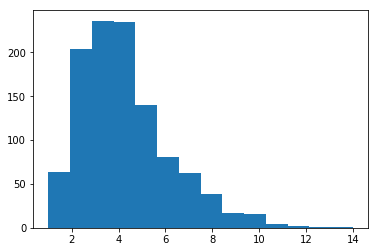

In [14]:
# zobrazeni histogramu pro hodnotu Y
N, bins, patches = plt.hist(data['word_length'], bins=len(data_grouped), density = False)
print(N)

In [15]:
# 2. Pro každý text zvlášť odhadněte pravděpodobnosti písmen (symbolů mimo mezery), které se v textech vyskytují. 
#    Výsledné pravděpodobnosti graficky znázorněte.

# X)
# parsování vstupního souboru
d = list()
with open("hw1-source/00" + str(X) + ".txt") as f:
    for line in f:
        d.append(line)
        
# vytvoření kolekce slov s jejich délkou
string = d[1].replace(" ", "")

# třída Counter ze vstupního řetězce spočítá četnost jednotlivých znaků
c = Counter(string)

# vytvoření datové struktury k pohodlné práci s daty
data = pandas.DataFrame([{'count': a, 'letter': b}
                  for b, a in sorted(c.most_common(), key = lambda val : val[0])
                  if True])
print("Výčet znaků (bez mezery) a jejich četnost:")
print(data)

suma = sum(data['count'])
print('\nSoučet počtu písmen řetězce: ', suma )

rel_data = copy.deepcopy(data)
rel_data['count'] = (data['count'] / suma) * 100

print('\nVýčet znaků (bez mezery) a jejich relativní četnost v (%):')
print(rel_data)

Výčet znaků (bez mezery) a jejich četnost:
    count letter
0     438      a
1      96      b
2     102      c
3     303      d
4     659      e
5     137      f
6     141      g
7     337      h
8     297      i
9      15      j
10     52      k
11    249      l
12    109      m
13    355      n
14    399      o
15     91      p
16      6      q
17    350      r
18    291      s
19    436      t
20    159      u
21     30      v
22    117      w
23      1      x
24     83      y
25      6      z

Součet počtu písmen řetězce:  5259

Výčet znaků (bez mezery) a jejich relativní četnost v (%):
        count letter
0    8.328580      a
1    1.825442      b
2    1.939532      c
3    5.761552      d
4   12.530899      e
5    2.605058      f
6    2.681118      g
7    6.408062      h
8    5.647461      i
9    0.285225      j
10   0.988781      k
11   4.734740      l
12   2.072637      m
13   6.750333      n
14   7.586994      o
15   1.730367      p
16   0.114090      q
17   6.655258      r
18 

Text(0.5,0,"Index of letters from 'a'=0 to 'z'=25")

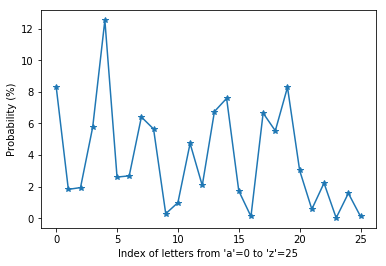

In [16]:
# zobrazeni grafu pro hodnotu X
plt.plot(rel_data['count'], '*-')
plt.ylabel('Probability (%)')
plt.xlabel('Index of letters from \'a\'=0 to \'z\'=25')

In [17]:
# Y)
# parsování vstupního souboru
d = list()
with open("hw1-source/0" + str(Y) + ".txt") as f:
    for line in f:
        d.append(line)
        
# vytvoření kolekce slov s jejich délkou
string = d[1].replace(" ", "")

# třída Counter ze vstupního řetězce spočítá četnost jednotlivých znaků
c = Counter(string)

# vytvoření datové struktury k pohodlné práci s daty
data = pandas.DataFrame([{'count': a, 'letter': b}
                  for b, a in sorted(c.most_common(), key = lambda val : val[0])
                  if True])
print("Výčet znaků (bez mezery) a jejich četnost:")
print(data)

suma = sum(data['count'])
print('\nSoučet počtu písmen řetězce: ', suma )

rel_data = copy.deepcopy(data)
rel_data['count'] = (data['count'] / suma) * 100

print('\nVýčet znaků (bez mezery) a jejich relativní četnost v (%):')
print(rel_data)

Výčet znaků (bez mezery) a jejich četnost:
    count letter
0     341      a
1      77      b
2     110      c
3     182      d
4     550      e
5     106      f
6     105      g
7     308      h
8     284      i
9       3      j
10     47      k
11    229      l
12     95      m
13    258      n
14    342      o
15     70      p
16      7      q
17    222      r
18    269      s
19    446      t
20    151      u
21     59      v
22    102      w
23      7      x
24     75      y
25      3      z

Součet počtu písmen řetězce:  4448

Výčet znaků (bez mezery) a jejich relativní četnost v (%):
        count letter
0    7.666367      a
1    1.731115      b
2    2.473022      c
3    4.091727      d
4   12.365108      e
5    2.383094      f
6    2.360612      g
7    6.924460      h
8    6.384892      i
9    0.067446      j
10   1.056655      k
11   5.148381      l
12   2.135791      m
13   5.800360      n
14   7.688849      o
15   1.573741      p
16   0.157374      q
17   4.991007      r
18 

Text(0.5,0,"Index of letters from 'a'=0 to 'z'=25")

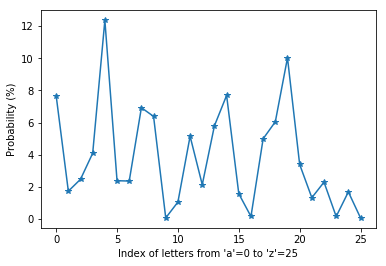

In [18]:
# zobrazeni grafu pro hodnotu Y
plt.plot(rel_data['count'], '*-')
plt.ylabel('Probability (%)')
plt.xlabel('Index of letters from \'a\'=0 to \'z\'=25')

In [19]:
# 3. Na hladině významnosti 5% otestujte hypotézu, že rozdělení délek slov nezávisí na tom, o který jde text. 
#    Určete také p-hodnotu testu.

# X)